<IPython.core.display.Javascript object>


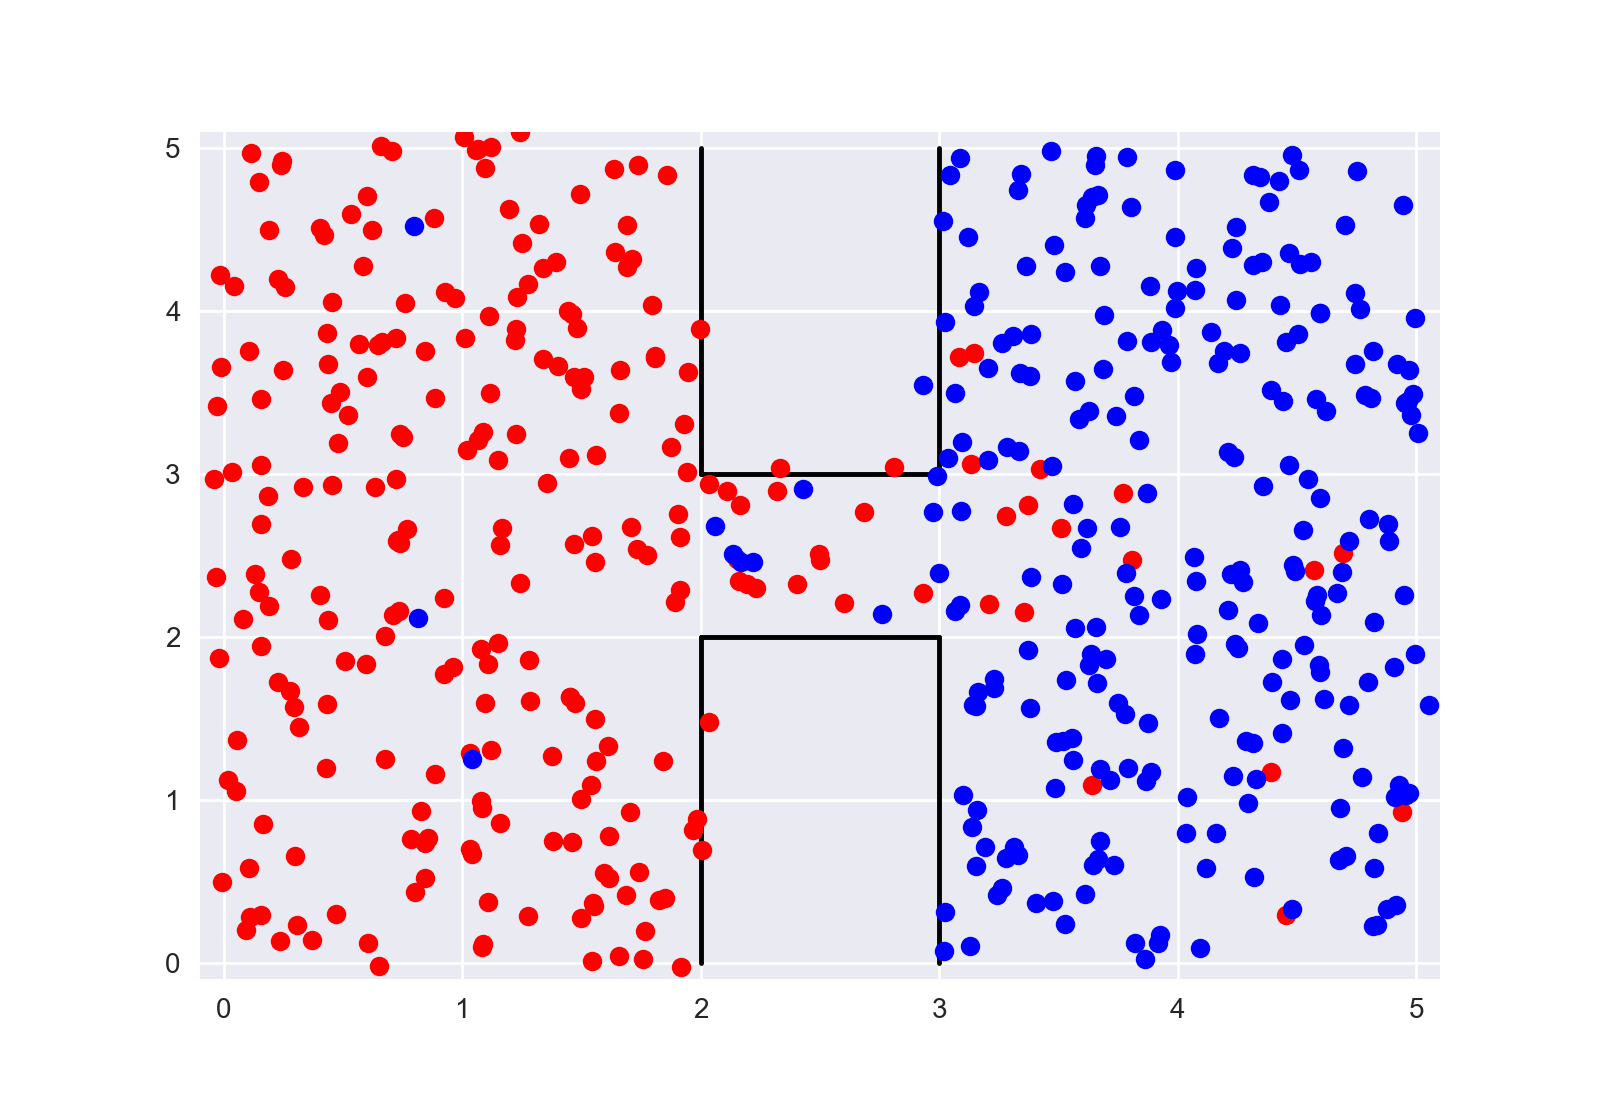

In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
import time

# Defining setup of the simulation
  
g = -0     # Put value of acceleration due to gravity. Upwards is positive

m1 = 5e-22 # Mass of half of particle 

m2 = 5e-21 # Mass of other half of particles

nop = 500 # Number of Particles to be simulated

nopreal = 1e25  # Number of particles represented

w = nopreal/nop # Weightage

d = 3.7e-10   # Diameter of particles

sigma = d     # Collison scale of particles

m_data = []
for i in range(0,nop):
    
    if(i < nop/2):
        m_data.append(m1)
        
    else:
        m_data.append(m2)
        
m_data = np.array(m_data)  # Mass of particles

rtemp = 295 #Room temp

wtemp = 295 # Wall Temp

kb =   1.3806485e-23   # Boltzman Constant

wallx = 5  # Wall boundary in x-direction

wally = 5  # Wall boundary in y-direction

nocx = 50   # No of cells in x

nocy = 50   # No of cells in y

celldx = wallx/nocx    # Cell Dimen x

celldy = wally/nocy    # Cell Dimen y

cell_ar = celldx*celldy # Area of cell

noct = int(nocx*nocy) # Total number of cells

x_his = [] # history of x-data

y_his = [] # history of y-data

# Defining initial conditions

# Defining initial distribution of particles

x_data = np.array([0.]*nop)
for i in range(0,int(nop/2)):
    
    x_data[i] = np.random.uniform()*2
    
for i in range(int(nop/2), int(nop)):
    
    x_data[i] = 3+(np.random.uniform()*2)

y_data = np.random.uniform(size = nop)*wally

# Adding initial conditions to history
x_his.append(x_data)
y_his.append(y_data)


# Defining initial velocities of particles

#Use this for boltzmann distrubuti9n
vx_data = (np.sqrt(-2*(kb/m_data)*rtemp*np.log(np.random.uniform(size = nop)))
            *np.cos(2*np.pi*np.random.uniform(size = nop)))
vy_data = (np.sqrt(-2*(kb/m_data)*rtemp*np.log(np.random.uniform(size = nop)))
            *np.sin(2*np.pi*np.random.uniform(size = nop)))

    
#Use this for random distribution 
# vx_data = (np.random.uniform(size = nop)-0.5)*60
# vy_data = (np.random.uniform(size = nop)-0.5)*60


# Making an array to hold the cell number data for each particle
cell_data = np.array([0]*nop)


# Plotting initial velocity and position distribution 
# v_data = np.sqrt((vx_data**2)+(vy_data**2))
# sns.distplot(vx_data, label="X_V")
# sns.distplot(vy_data, label="y_v")
# sns.distplot(v_data, label="V")
# plt.legend()
# plt.show()
# plt.gcf().clear()

# plt.plot(x_data,y_data ,"ro")
# plt.show()
# plt.gcf().clear()

#range  
tstart = 0.
tstop = 8

# set up steps 
n = 200

dt = (tstop-tstart)/n
# set up the array of time
t= np.linspace(tstart, tstop, n) 

l = 1  # Steps over which integration takes place

# Defining differential equation functions for position and velocity
def velocityx():
    
    return 0

def velocityy():
    
    return g

def posx(vx):
    
    return vx

def posy(vy):
    
    return vy

# Function for solving the differential equations 
def solvstep(f, x, args,n):
    
    return x + ((dt/n)*f(**args))


# Starting the simulation

for m in range(0,n):
    
    # Simulationg motion of particles under external forces
    
    for h in range(0,l):
        x_data = solvstep(posx, x_data, {"vx":vx_data},l)
    
        y_data = solvstep(posy, y_data, {"vy":vy_data},l)
    
        vx_data = solvstep(velocityx, vx_data, {},l)
    
        vy_data = solvstep(velocityy, vy_data, {},l)
    
    
    
#     Code for adding a connecting tube

#     for i in range(0,nop):
#        
#        
#         if((x_data[i] >= 2 and x_data[i] <= (2+(vx_data[i]*dt)) and vx_data[i] > 0) or 
#                                  (x_data[i] <= 3 and x_data[i] >= (3+(vx_data[i]*dt))
#                                                                      and vx_data[i] < 0) ):
#       
#             if(y_data[i] <= 2  or y_data[i] >= 3):
#                
#                 vx_data[i] = -vx_data[i]
#               
#     
#         if((y_data[i] <= 2 and y_data[i] >= (2+(vy_data[i]*dt)) and vy_data[i] < 0) 
#            or (y_data[i] >= 3 and y_data[i] <= (3+(vy_data[i]*dt)) and vy_data[i] > 0) ):
#        
#             if(x_data[i] >= 2 and x_data[i] <= 3):
#                
#                 vy_data[i] = -vy_data[i]
       
    
    
    # Simulating Collisions
                
      
    # Calculating and assigning cell number to each particle
    for j in range(0,nop):
        
        xcellno =  int(x_data[j] / celldx)  # Cell # of the particle in x-axis
        
        ycellno = int(y_data[j]/ celldy)    # Cell # of the particle in y-axis
        
        if (ycellno < 0):
            
            ycellno = 0
            
        if (xcellno < 0):
            
            xcellno = 0
            
            
        cellno = ((ycellno)*nocx)+xcellno
        
        cell_data[j] = cellno
        
     
    # Working out collisions in each cell
    
    for j in range(0,noct):
        
        parincell = []
        
        for f in range(0, nop):
            
            if(cell_data[f] == j):
                
                parincell.append(f)     # Making array of particle numbers in the given cell
                
        
        parincell = np.array(parincell)
        
        for i in range(0, parincell.size):
            
            for k in range(i+1, parincell.size):
                
                if(True ):
                    
                    a = parincell[i]
                    b = parincell[k]
                    gx = vx_data[b] - vx_data[a]
                    gy = vy_data[b] - vy_data[a]
                
                    vel = np.sqrt((gx**2)+(gy**2))  # Calculating relative velocity for 
                                                    # the pair of particles
#                     if(gx > 0 and gy > 0):
                    
#                         prob = 0
                    
#                     else:
                    
#                         prob = dt*vel*sigma*w/cell_ar
                    
    
                    prob = dt*vel*sigma*w/cell_ar  # Calculating probability of collision 
                
                    alpha = np.random.uniform()
                
                    if(alpha < prob):
                        
                    # if collision occurs, calculating velocities of particles 
                    # after collision and replacing initial velocities with them
                        alpha1 = np.random.uniform()
                    
                        diff = (((vx_data[a]-vx_data[b])*(np.cos(2*np.pi*alpha1)))+
                                ((vy_data[a]-vy_data[b])*(np.sin(2*np.pi*alpha1))))
                                
                    
                        vx_data[b] = vx_data[b] + ((diff)*np.cos(2*np.pi*alpha1))
                    
                        vx_data[a] = vx_data[a] - ((diff)*np.cos(2*np.pi*alpha1))
                    
                        vy_data[b] = vy_data[b] + ((diff)*np.sin(2*np.pi*alpha1))
                    
                        vy_data[a] = vy_data[a] - ((diff)*np.sin(2*np.pi*alpha1))
                
                
                   
       
    
    
    # Simulating collision from boundaries
    
    for i in range(0,nop):
        
        # Collision from y wall
        
        if((y_data[i] <= 0 and vy_data[i] < 0 ) or (y_data[i] >= wally and vy_data[i] > 0)):
            
            # Use this to simulate collision with heat flux
            
#             alpha_1 = np.random.uniform()
#             alpha_2 = np.random.uniform()
#             alpha_3 = np.random.uniform()

#             vx_data[i] = np.sqrt(-2*(kb/m_data[i])*wtemp*np.log(alpha_1))*np.cos(2*np.pi*alpha_2)
#             vy_data[i] = np.sqrt(-2*(kb/m_data[i])*wtemp*np.log(alpha_3))
            
    
            # Use this to simulate elastic collisions
        
            vy_data[i] = -vy_data[i]
    
            
#             if (y_data[i] >= wally):
                
##                 y_data[i] = wally
#                 vy_data[i] = -vy_data[i]
                
#             if(y_data[i] <=0 ):
#                 y_data[i] = 0
        
    
        # Collision from x wall
        
        if((x_data[i] <= 0 and vx_data[i] < 0 ) or (x_data[i] >= wallx and vx_data[i] > 0)):
            
            # Use this to simulate collision with heat flux
            
#             alpha_1 = np.random.uniform()
#             alpha_2 = np.random.uniform()
#             alpha_3 = np.random.uniform()
        
#             vx_data[i] = np.sqrt(-2*(kb/m_data[i])*wtemp*np.log(alpha_1))
#             vy_data[i] = np.sqrt(-2*(kb/m_data[i])*wtemp*np.log(alpha_2))*np.cos(2*np.pi*alpha_3)
            
           # Use this to simulate elastic collisions
            vx_data[i] = -vx_data[i]
            
#             if (x_data[i] <=0):
                
#                 x_data[i] = 0
                
#             if(x_data[i] >= wallx):
# #                 x_data[i] = wallx
#                 vx_data[i] = -vx_data[i]

      
    

    # Append x and y data to history 
    x_his.append(x_data)
    y_his.append(y_data)

    
    
# Making a fugure and a subplot
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

ax1.set_xlim(-celldx, wallx+celldx)
ax1.set_ylim(-celldy, wally+celldy)

# Plotting the tunnel
# ax1.plot([2,2], [3,5],'black')
# ax1.plot([2,2], [0,2], 'black')
# ax1.plot([3,3], [3,5],'black')
# ax1.plot([3,3], [0,2], 'black')
# ax1.plot([2,3], [2,2], 'black')
# ax1.plot([2,3], [3,3], 'black')

ims_1 = []

ims_2 = []


# Making array of plots to animate
for i in range(0, n):
    
    
    ims_1.append(ax1.plot(x_his[i][0:int(nop/2)], y_his[i][0:int(nop/2)], 'ro', color = 'r'))

    ims_2.append(ax1.plot(x_his[i][int(nop/2):], y_his[i][int(nop/2):], 'ro', color = 'b'))
    
im_ani_1 = animation.ArtistAnimation(fig, ims_1, interval=n, repeat_delay=500,
                                   blit=True)

im_ani_2 = animation.ArtistAnimation(fig, ims_2, interval=n, repeat_delay=500,
                                   blit=True)

# Use this to plot the final condition of thr system
# ax1.plot(x_his[-1], y_his[-1],'ro')


plt.show()

<IPython.core.display.Javascript object>


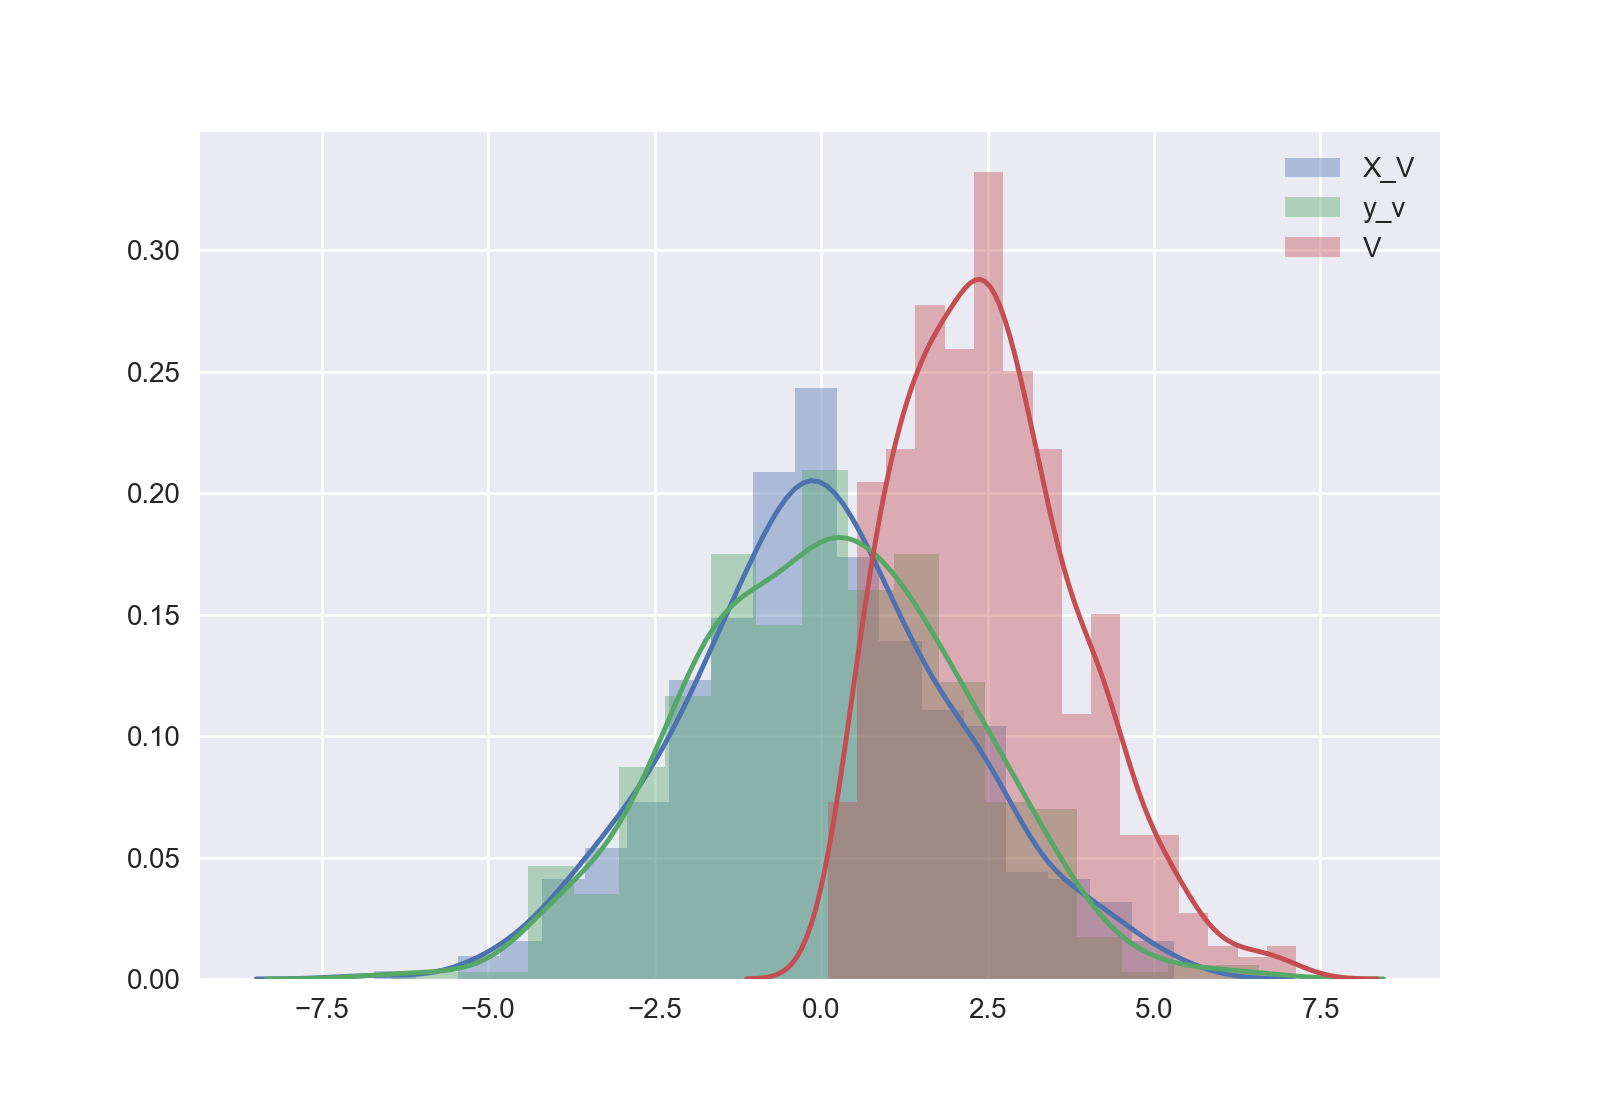

In [7]:
# Plotting final distrubution of velocities

v_data = np.sqrt((vx_data**2)+(vy_data**2))

sns.distplot(vx_data, label="X_V")

sns.distplot(vy_data, label="y_v")

sns.distplot(v_data, label="V")

plt.legend()

plt.show()



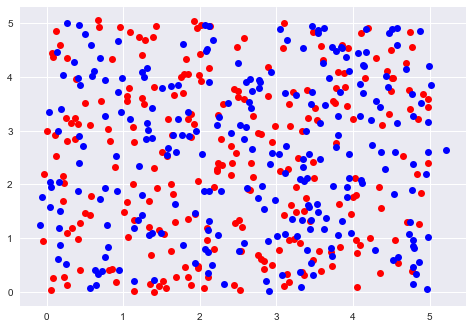

In [8]:
#Plotting final distribution of positions

plt.plot(x_his[-1][0:int(nop/2)], y_his[i][0:int(nop/2)], 'ro', color = 'r')

plt.plot(x_his[-1][int(nop/2):], y_his[i][int(nop/2):], 'ro', color = 'b')

plt.show()

plt.gcf().clear()

<IPython.core.display.Javascript object>


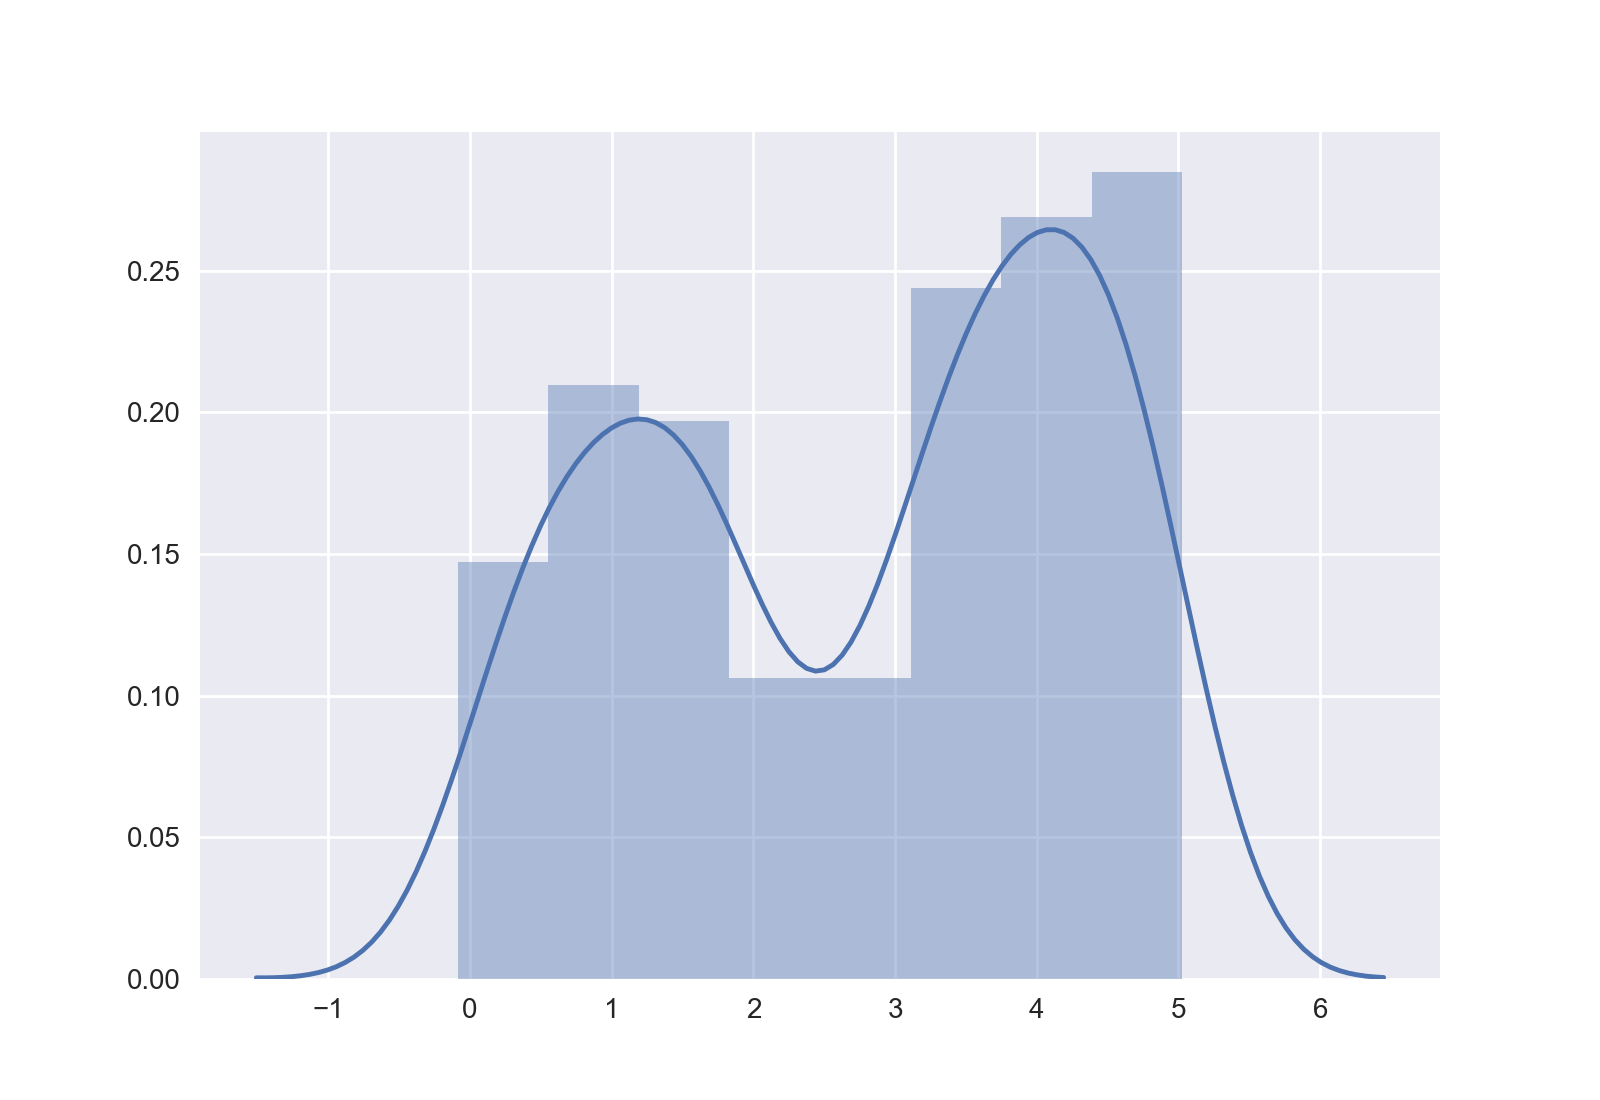

In [14]:
#Plotting final distribution of positions

y_data = y_his[-1]

x_data = x_his[-1]

sns.distplot(x_data)

plt.show()

    

<IPython.core.display.Javascript object>


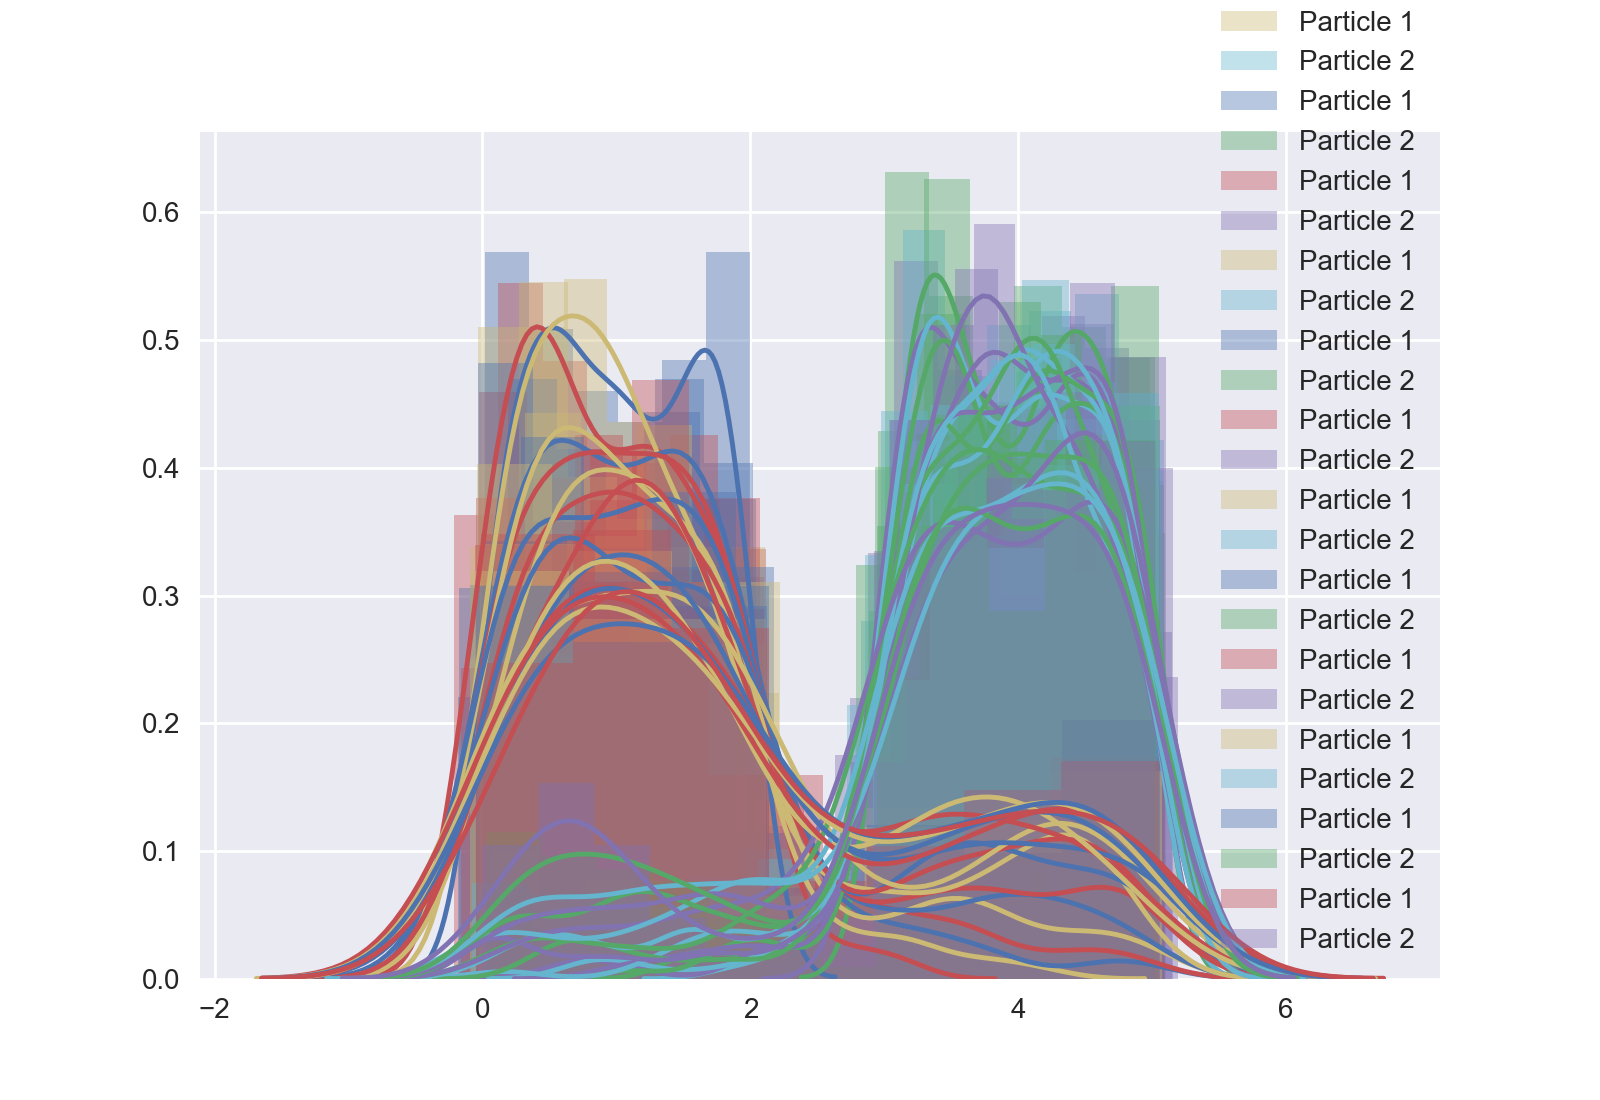

In [15]:
# Plot x- distributon of particles through different points in time
for i in range(0,n,10):
    
    sns.distplot(x_his[i][0:int(nop/2)],label = "Particle 1")
    sns.distplot(x_his[i][int(nop/2):], label = "Particle 2")
    
    plt.legend()
    plt.show()

In [9]:
# Calculating the average KE

v_data = np.sqrt((vx_data**2)+(vy_data**2))

ke_data = (1/2)*m_data*v_data*v_data

meanke = np.mean(ke_data)

print("Boltsman Constant: ", meanke/rtemp)

Boltsman Constant:  3.54177444831e-23
